# Problem 1 - Wholesale Customers Analysis

## Problem Statement - A wholesale distributor operating in different regions of Portugal has information on the annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channels (Hotel, Retail).


### 1.1.1 Use methods of descriptive statistics to summarize data.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
wcdf = pd.read_csv('Wholesale+Customers+Data.csv')

In [19]:
wcdf.shape

(440, 9)

In [20]:
wcdf.head()

Buyer/Spender Channel Region  Fresh  Milk  Grocery  Frozen  \
0              1  Retail  Other  12669  9656     7561     214   
1              2  Retail  Other   7057  9810     9568    1762   
2              3  Retail  Other   6353  8808     7684    2405   
3              4   Hotel  Other  13265  1196     4221    6404   
4              5  Retail  Other  22615  5410     7198    3915   

   Detergents_Paper  Delicatessen  
0              2674          1338  
1              3293          1776  
2              3516          7844  
3               507          1788  
4              1777          5185

In [21]:
wcdf.tail()

Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
435            436   Hotel  Other  29703  12051    16027   13135   
436            437   Hotel  Other  39228   1431      764    4510   
437            438  Retail  Other  14531  15488    30243     437   
438            439   Hotel  Other  10290   1981     2232    1038   
439            440   Hotel  Other   2787   1698     2510      65   

     Detergents_Paper  Delicatessen  
435               182          2204  
436                93          2346  
437             14841          1867  
438               168          2125  
439               477            52

In [22]:
wcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [23]:
#Checking for null values
wcdf.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

- No missing values found or Null values found

In [24]:
wcdf.describe().round(3).T

count       mean        std   min      25%     50%  \
Buyer/Spender     440.0    220.500    127.161   1.0   110.75   220.5   
Fresh             440.0  12000.298  12647.329   3.0  3127.75  8504.0   
Milk              440.0   5796.266   7380.377  55.0  1533.00  3627.0   
Grocery           440.0   7951.277   9503.163   3.0  2153.00  4755.5   
Frozen            440.0   3071.932   4854.673  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493   4767.854   3.0   256.75   816.5   
Delicatessen      440.0   1524.870   2820.106   3.0   408.25   965.5   

                       75%       max  
Buyer/Spender       330.25     440.0  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0

In [25]:
wcdf['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [26]:
wcdf['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [27]:
wcdf.skew(axis=0)

C:\Users\harih\AppData\Local\Temp\ipykernel_13380\3749516218.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wcdf.skew(axis=0)


Buyer/Spender        0.000000
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicatessen        11.151586
dtype: float64

- maximum values are higher than the median shows presence of outliers.
- the consumers buy Fresh products and grocery more compare to other products.
- Delicatessens are the least purchased item.
- Data given is skewed (ignoring the number of Buyer/Spender, as it won't change) and for the other colums we can visualise through boxplot.

#### VISUALISING OUTLIERS USING BOX PLOTS

In [3]:
wc_df = wcdf.copy()

In [4]:
wc_df.drop(['Buyer/Spender'], axis=1, inplace=True)

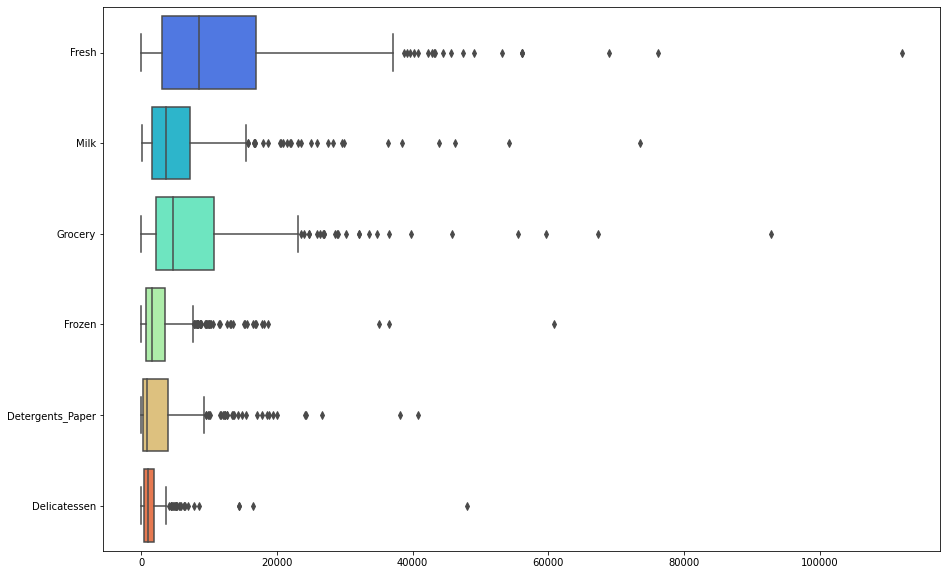

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data=wc_df, orient = 'h', palette = 'rainbow');

- The above plot shows presence of outliers which means and is right skewed
- This also shows that there are some buyer/spenders who are spending more than others.

#### HISTOGRAM FOR THE DATA

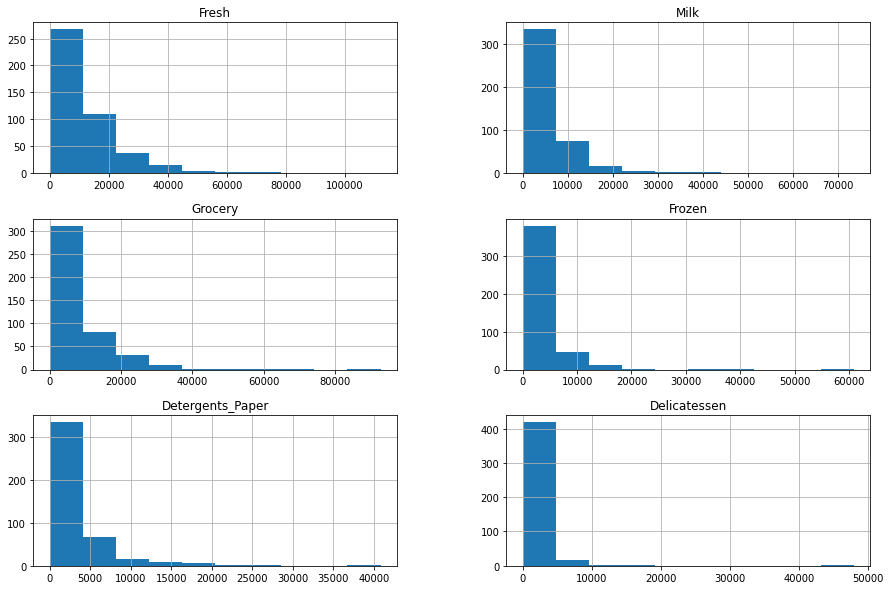

In [36]:
wc_df.hist(figsize=(15,10));

********************************************************************************************************************************

### 1.1.2 Which Region and which Channel spent the most?
### 1.1.3 Which Region and which Channel spent the least?

- To understand this we need to calculate the total spendings of all each channel and region
- adding total expense column to the data frame = "Tota_exp"

In [13]:
wc_df["Total_exp"] = wc_df["Fresh"] + wc_df["Milk"] + wc_df["Grocery"] + wc_df["Frozen"] + wc_df["Detergents_Paper"] + wc_df["Delicatessen"]
wc_df.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0  Retail  Other  12669  9656     7561     214              2674   
1  Retail  Other   7057  9810     9568    1762              3293   
2  Retail  Other   6353  8808     7684    2405              3516   
3   Hotel  Other  13265  1196     4221    6404               507   
4  Retail  Other  22615  5410     7198    3915              1777   

   Delicatessen  Total_exp  
0          1338      34112  
1          1776      33266  
2          7844      36610  
3          1788      27381  
4          5185      46100

In [14]:
Channel_spendings= wc_df.groupby(['Channel'])['Total_exp'].sum().sort_values(ascending=False)
Channel_spendings

Channel
Hotel     7999569
Retail    6619931
Name: Total_exp, dtype: int64

In [15]:
Region_spendings= wc_df.groupby(['Region'])['Total_exp'].sum().sort_values(ascending=False).head()
Region_spendings

Region
Other     10677599
Lisbon     2386813
Oporto     1555088
Name: Total_exp, dtype: int64

- The highest spending **_Channel_** is Hotel and the lowest is Retail.
- The highest spending **_Region_** is Other and the lowest is Oporto.

#### USING BARPLOT FOR VISUALISATION

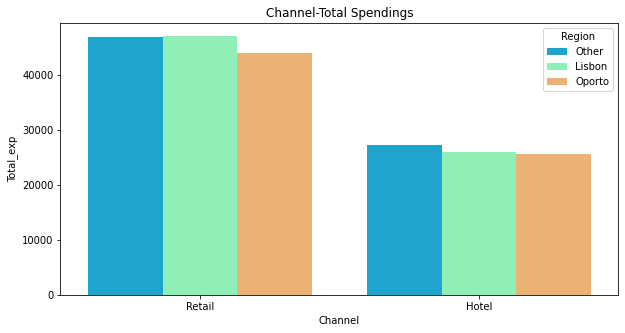

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x='Channel', y ='Total_exp' , hue='Region',data=wc_df, ci = False, palette='rainbow');
plt.title('Channel-Total Spendings');

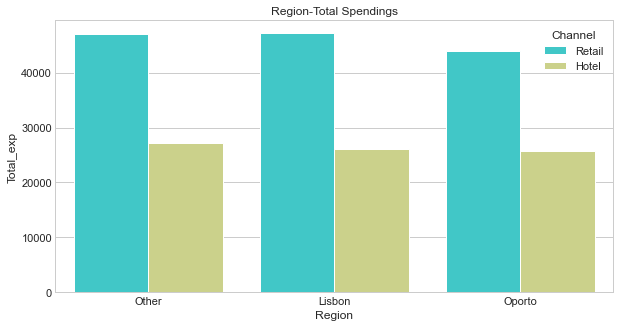

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x='Region', y ='Total_exp' , hue='Channel',data=wc_df, ci = False, palette='rainbow');
plt.title('Region-Total Spendings');

- The above plots confirm that most of our data ,i.e.,most of given data is observed from 'Other' region with the highest spendings.
- That means 75 % of the data observed is from 'Other' region.

********************************************************************************************************************************

### 1.1.3 Which Region and which Channel spent the least?

- From the data obtained in above plots and calculations, the least spending channel is **Retail**.
- From the data obtained in above plots and calculations, the least spending region is **Oporto**.

********************************************************************************************************************************

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

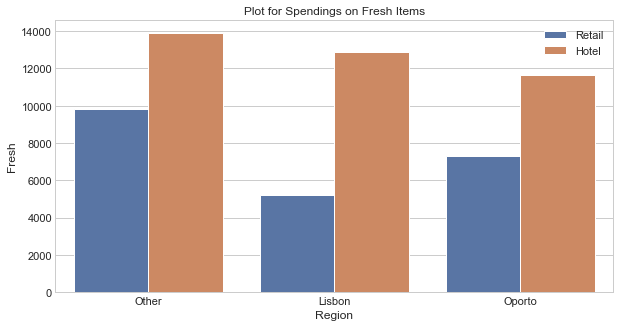

In [123]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Fresh', hue = 'Channel', ci = None)
plt.legend(bbox_to_anchor=[1,1]);
plt.title('Plot for Spendings on Fresh Items');

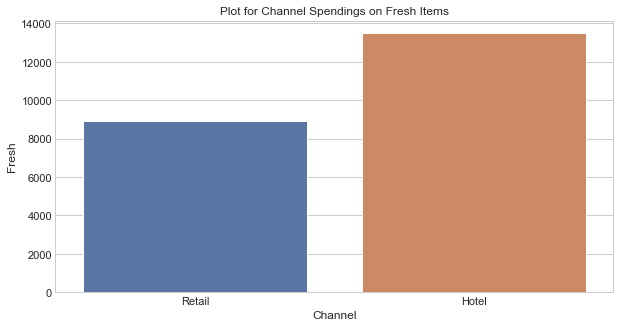

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Fresh', ci = None)
plt.title('Plot for Channel Spendings on Fresh Items');

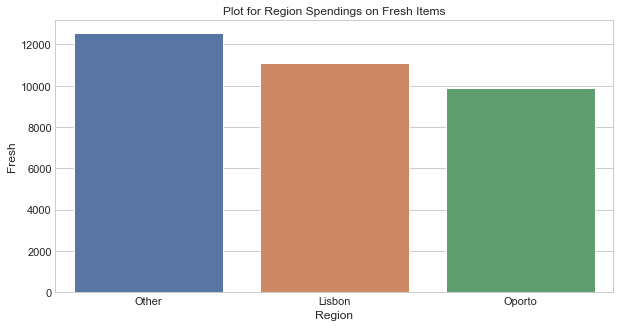

In [142]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Fresh', ci = None)
plt.title('Plot for Region Spendings on Fresh Items');

In [109]:
wc_df["Fresh"].mean()

12000.297727272728

- Average spending on Fresh products is the highest,, which is around 12000.30 by 'Hotel' Channel in 'Other' Region.

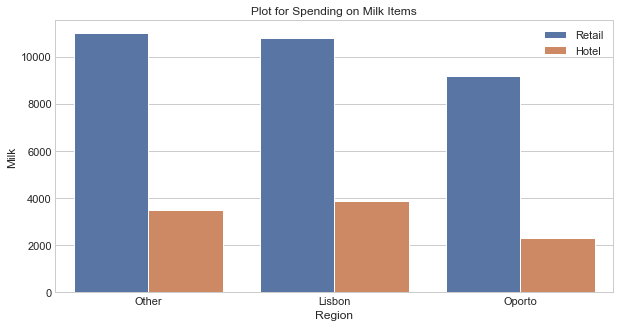

In [146]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Milk', hue = 'Channel', ci = None)
plt.legend(bbox_to_anchor=[1,1]);
plt.title('Plot for Spending on Milk Items');

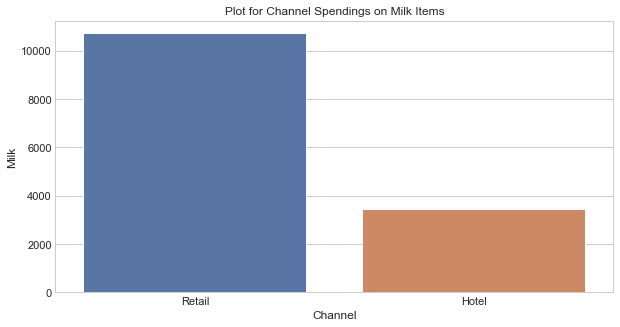

In [141]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Milk', ci = None)
plt.title('Plot for Channel Spendings on Milk Items');

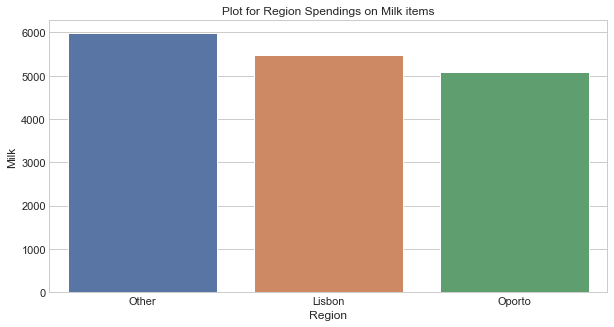

In [116]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Milk', ci = None)
plt.title('Plot for Region Spendings on Milk items');

In [137]:
wc_df["Milk"].mean()

5796.265909090909

- Average spending on Milk items is 5796.30 by 'Retail' Channel in 'Other' Region.

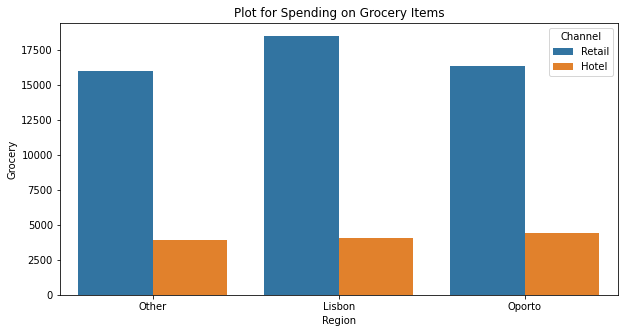

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Grocery', hue = 'Channel', ci = None)
plt.title('Plot for Spending on Grocery Items');

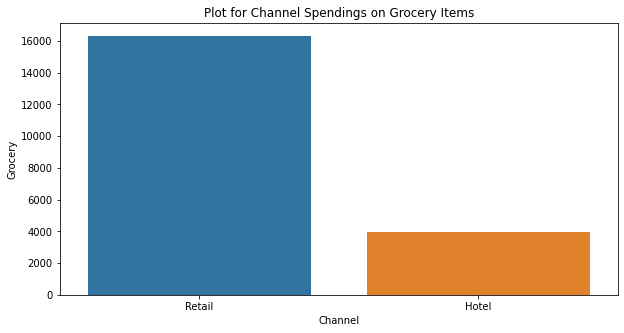

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Grocery', ci = None)
plt.title('Plot for Channel Spendings on Grocery Items');

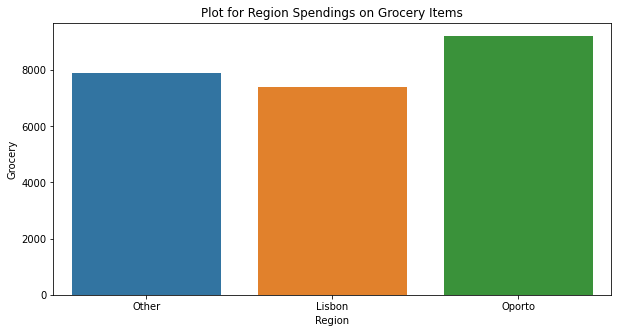

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Grocery', ci = None)
plt.title('Plot for Region Spendings on Grocery Items');

In [138]:
wc_df["Grocery"].mean()

7951.277272727273

- Average spendings on 'Grocery' item is 7951.28 by 'Retail' Channel in 'Oporto' Region

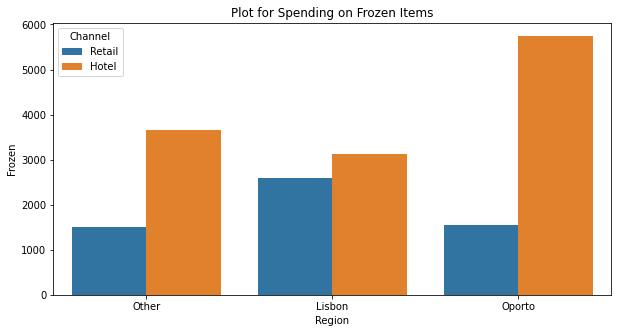

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Frozen', hue = 'Channel', ci = None)
plt.title('Plot for Spending on Frozen Items');

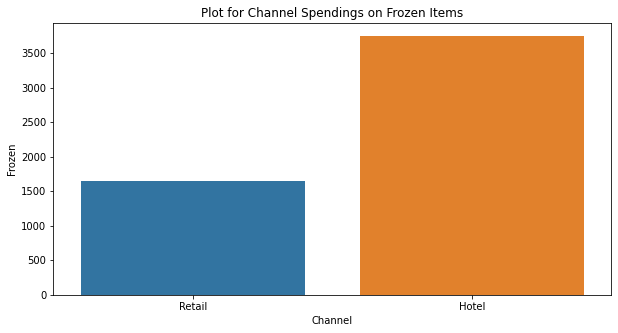

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Frozen', ci = None)
plt.title('Plot for Channel Spendings on Frozen Items');

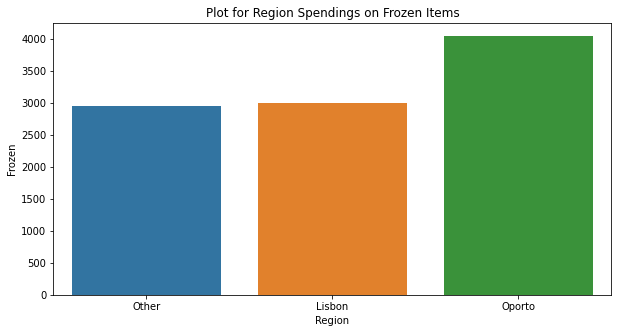

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Frozen', ci = None)
plt.title('Plot for Region Spendings on Frozen Items');

In [147]:
wc_df["Frozen"].mean()

3071.931818181818

- Average spendings on 'Frzoen' item is 3071.93 by 'Hotel' Channel in 'Oporto' Region

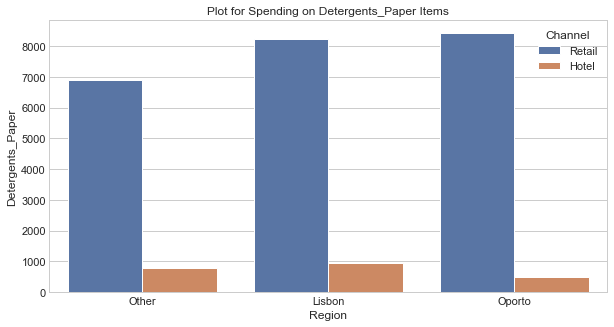

In [131]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Detergents_Paper', hue = 'Channel', ci = None)
plt.title('Plot for Spending on Detergents_Paper Items');

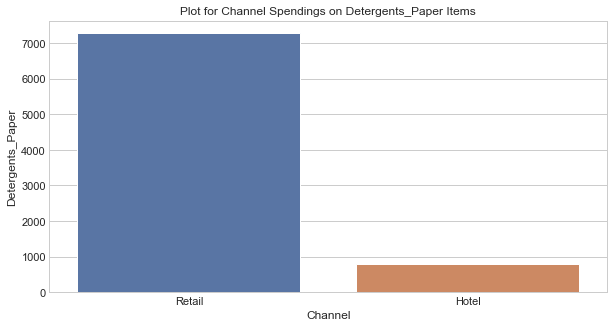

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Detergents_Paper', ci = None)
plt.title('Plot for Channel Spendings on Detergents_Paper Items');

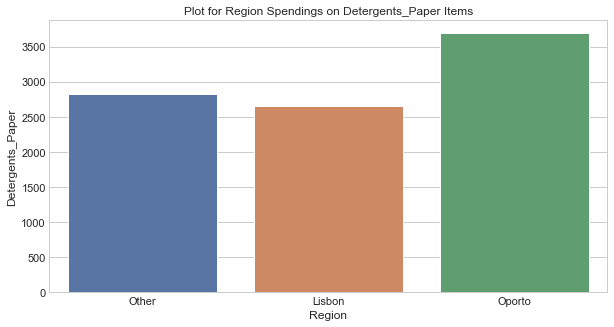

In [148]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Detergents_Paper', ci = None)
plt.title('Plot for Region Spendings on Detergents_Paper Items');

In [149]:
wc_df["Detergents_Paper"].mean()

2881.4931818181817

- Average spendings on 'Grocery' item is 2881.49 by 'Retail' Channel in 'Oporto' Region.

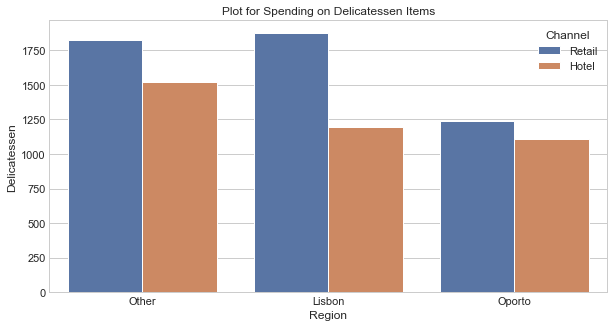

In [134]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x= 'Region', y ='Delicatessen', hue = 'Channel', ci = None)
plt.title('Plot for Spending on Delicatessen Items');

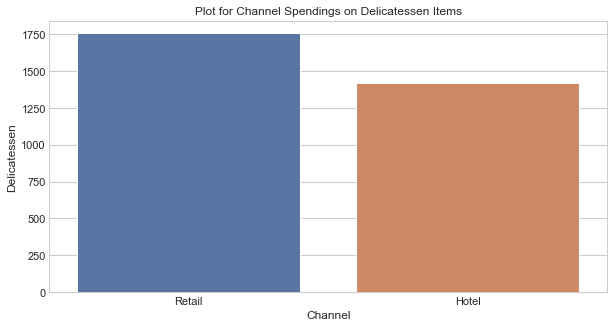

In [135]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Channel', y='Delicatessen', ci = None)
plt.title('Plot for Channel Spendings on Delicatessen Items');

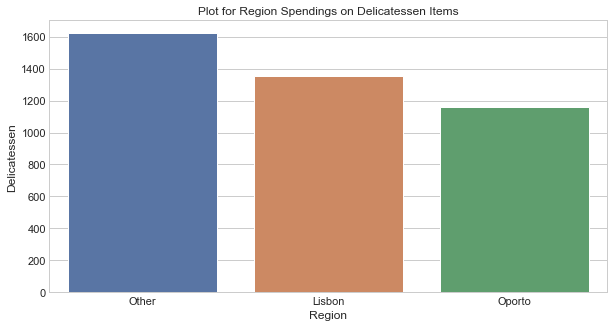

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(data = wc_df, x='Region', y='Delicatessen', ci = None)
plt.title('Plot for Region Spendings on Delicatessen Items');

In [150]:
wc_df["Delicatessen"].mean()

1524.8704545454545

- Average spendings on 'Grocery' item is 1524.87 by 'Retail' Channel in 'Other' Region.

*******************************************************************************************************************************

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?


In [6]:
#making a new copy of the given data
wcdf1 = wcdf.copy()

In [7]:
wcdf1.drop('Buyer/Spender', axis = 1, inplace = True)

In [8]:
wcdf1.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3   Hotel  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185

In [28]:
wcdf1.describe().T

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicatessen      440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicatessen       1820.25   47943.0

In [48]:
wcdf1.var()

C:\Users\harih\AppData\Local\Temp\ipykernel_13380\426502817.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  wcdf1.var()


Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [49]:
mu = np. mean (wcdf1)
sigma = np.std (wcdf1)
cv = sigma/mu
cv.round(2)

C:\Users\harih\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\harih\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\harih\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=o

Fresh               1.05
Milk                1.27
Grocery             1.19
Frozen              1.58
Detergents_Paper    1.65
Delicatessen        1.85
dtype: float64

*******************************************************************************************************************************

### 1.4 Are there any outliers in the data?


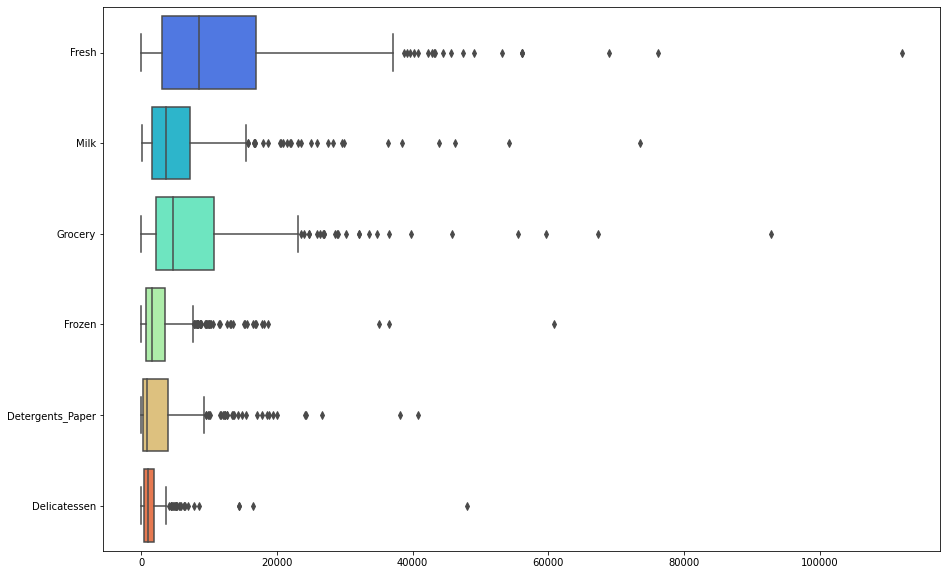

In [30]:
plt.figure(figsize=(15,10))
sns.boxplot(data=wcdf1, orient = 'h', palette = 'rainbow');

In [189]:
wcdf1.describe().round(2).T

count      mean       std   min      25%     50%       75%  \
Fresh             440.0  12000.30  12647.33   3.0  3127.75  8504.0  16933.75   
Milk              440.0   5796.27   7380.38  55.0  1533.00  3627.0   7190.25   
Grocery           440.0   7951.28   9503.16   3.0  2153.00  4755.5  10655.75   
Frozen            440.0   3071.93   4854.67  25.0   742.25  1526.0   3554.25   
Detergents_Paper  440.0   2881.49   4767.85   3.0   256.75   816.5   3922.00   
Delicatessen      440.0   1524.87   2820.11   3.0   408.25   965.5   1820.25   

                       max  
Fresh             112151.0  
Milk               73498.0  
Grocery            92780.0  
Frozen             60869.0  
Detergents_Paper   40827.0  
Delicatessen       47943.0

*******************************************************************************************************************************

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.


In [51]:
wcdf1.corr()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000

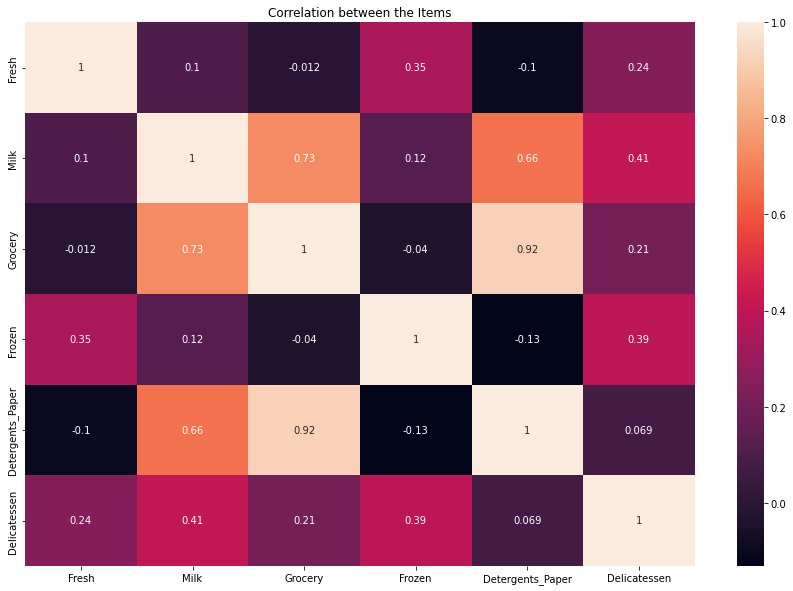

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(wcdf1.corr(),annot=True)
plt.title('Correlation between the Items');
plt.show()

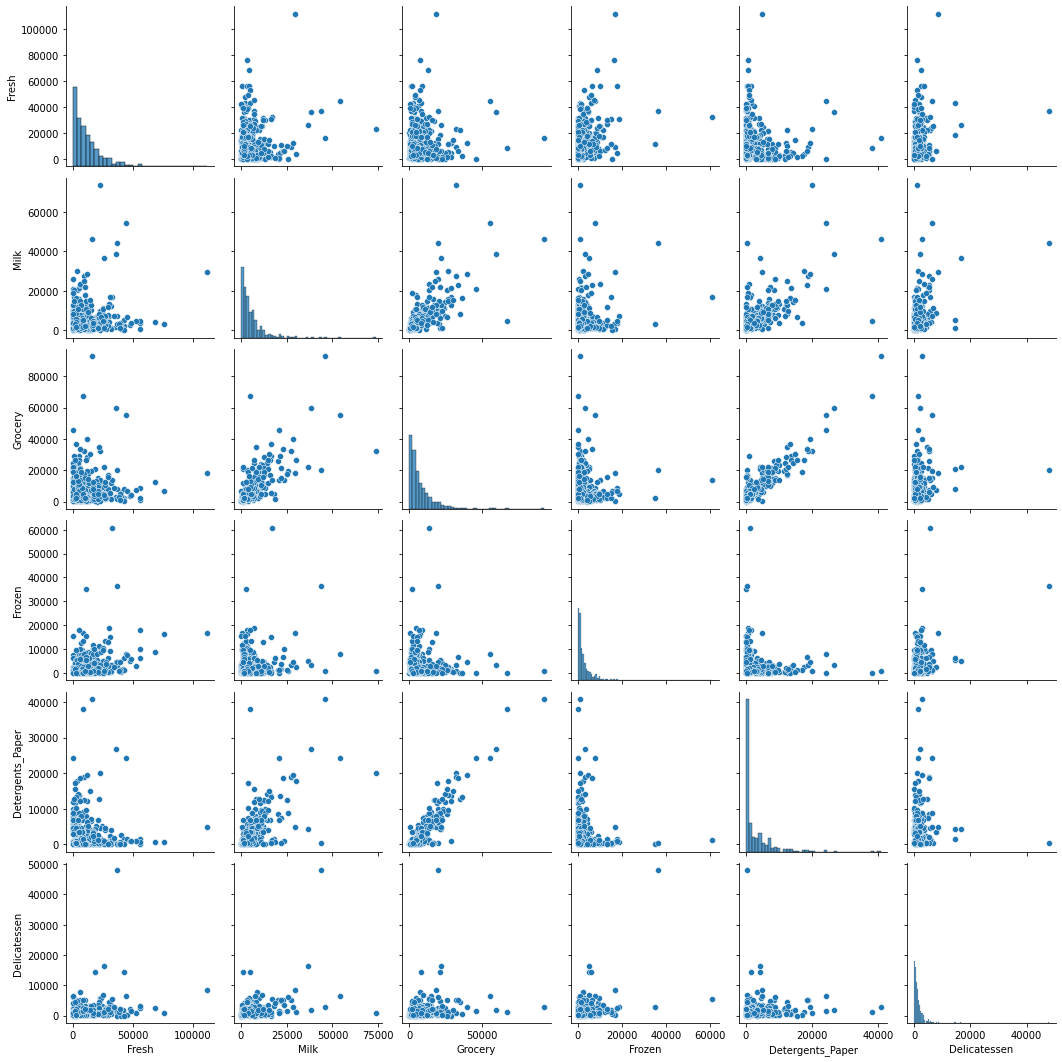

In [53]:
sns.pairplot(wcdf1);

*******************************************************************************************************************************

# Problem 2: The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.


### 2.1 Perform Exploratory Data Analysis [Univariate, Bivariate, and Multivariate analysis to be performed]. What insight do you draw from the EDA?

In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Read the dataset
edu = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [73]:
edu.head(2)

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56

In [35]:
edu.tail(2)

Names   Apps  Accept  Enroll  Top10perc  \
775               Yale University  10705    2453    1317         95   
776  York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
775      2115   96        96        5.8           49   40386         99  
776      1250   75        75       18.1           28    4509         99

In [36]:
edu.shape

(777, 18)

In [37]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [38]:
edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [39]:
edu.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

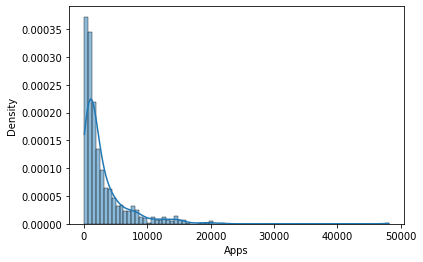

In [78]:
sns.histplot( data=edu, x='Apps', kde= True, stat = 'density');

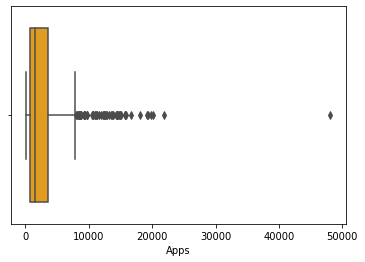

In [62]:
sns.boxplot(data=edu, x='Apps',color='orange');

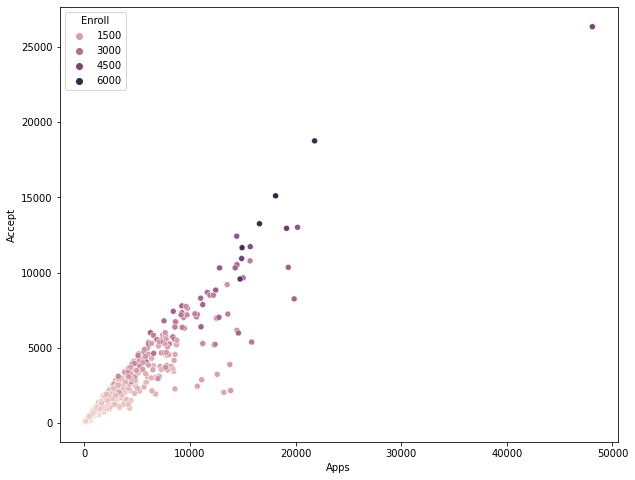

In [107]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=edu, x="Apps", y="Accept", hue = 'Enroll');

<Figure size 576x360 with 0 Axes>

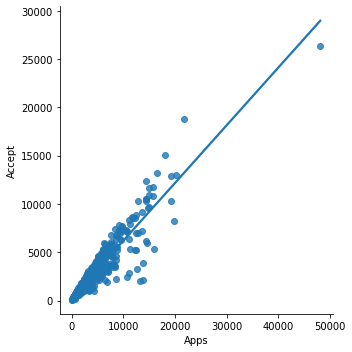

In [95]:
plt.figure(figsize=(8, 5))
sns.lmplot(data=edu, x="Apps", y="Accept", ci = False);

<Figure size 576x360 with 0 Axes>

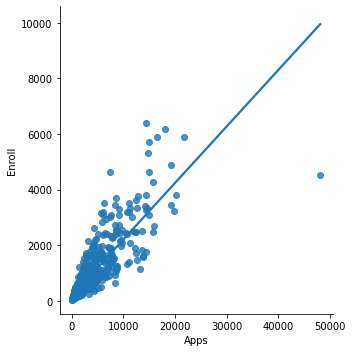

In [98]:
plt.figure(figsize=(8, 5))
sns.lmplot(data=edu, x="Apps", y="Enroll", ci = False);

<Figure size 576x360 with 0 Axes>

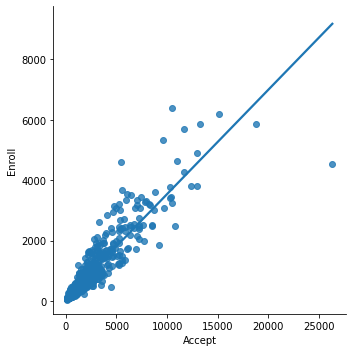

In [101]:
plt.figure(figsize=(8, 5))
sns.lmplot(data=edu, x="Accept", y="Enroll", ci = False);

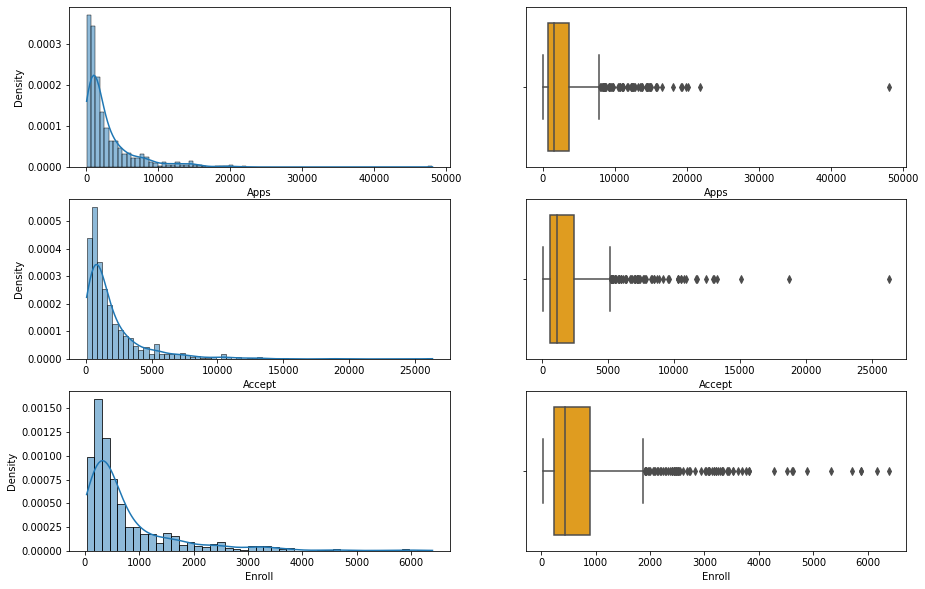

In [64]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 10)

a = sns.histplot( data=edu, x='Apps', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='Apps',color='orange' , ax=axes[0][1])

a = sns.histplot(data=edu, x='Accept', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='Accept',color='orange' , ax=axes[1][1])

a = sns.histplot(data=edu, x='Enroll', kde= True, stat = 'density', ax=axes[2][0])
a = sns.boxplot(data=edu, x='Enroll', color='orange', ax=axes[2][1])


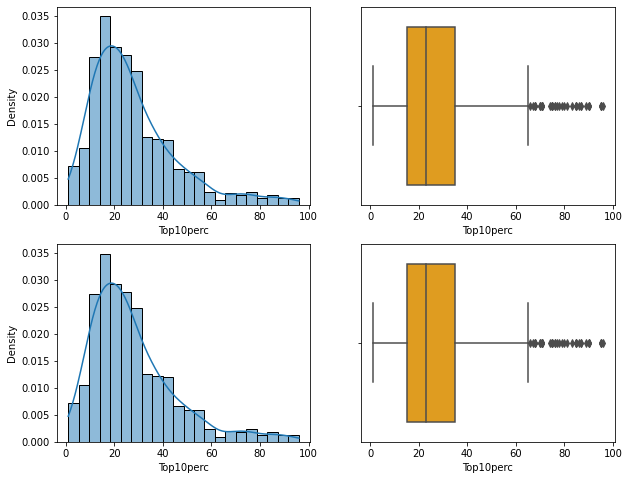

In [65]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)

a = sns.histplot(data=edu, x='Top10perc', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='Top10perc',color='orange', ax=axes[0][1])

a = sns.histplot( data=edu, x='Top10perc', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='Top10perc',color='orange' , ax=axes[1][1])

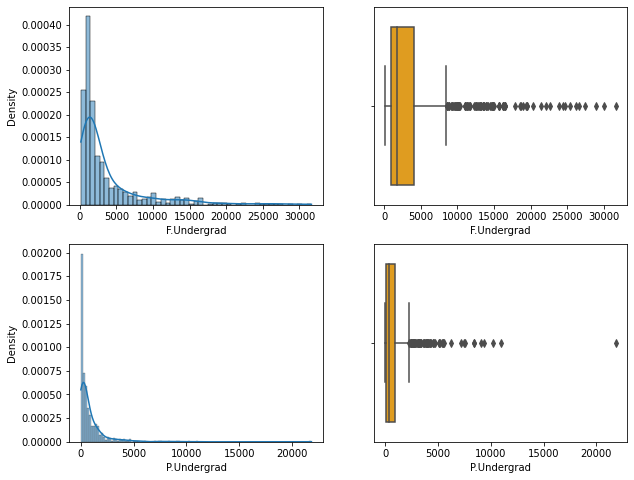

In [66]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(10,8)
a = sns.histplot(data=edu, x='F.Undergrad', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='F.Undergrad', color='orange', ax=axes[0][1])

a = sns.histplot(data=edu, x='P.Undergrad', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='P.Undergrad',color='orange', ax=axes[1][1])


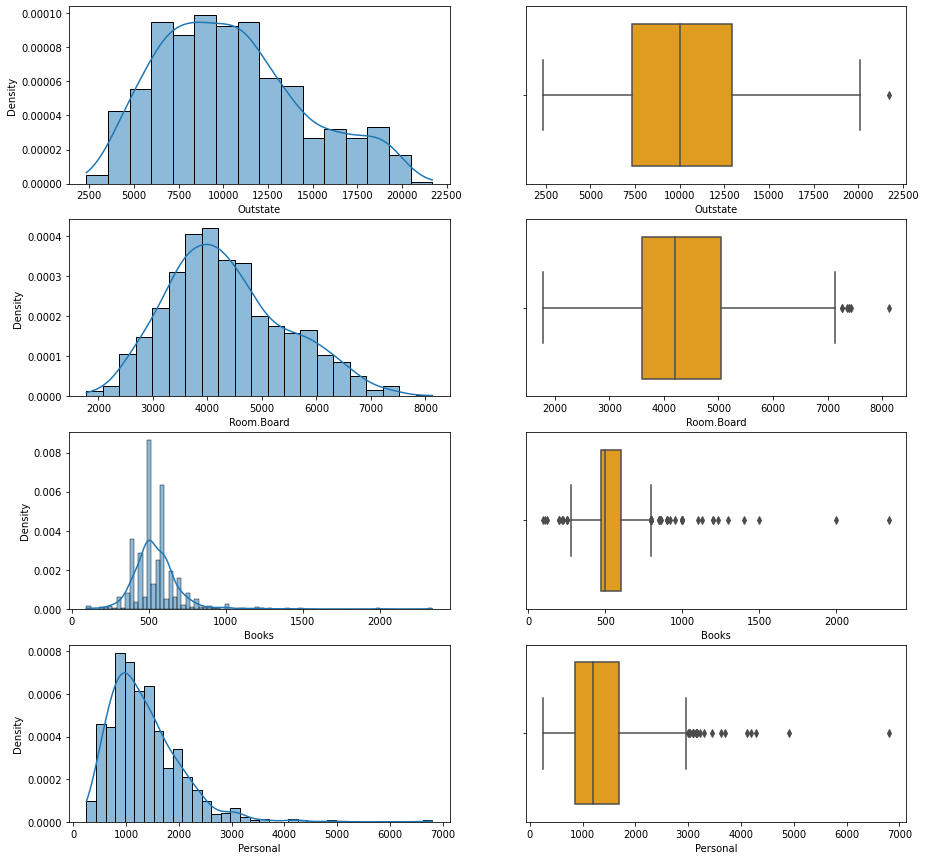

In [68]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,15)
a = sns.histplot(data=edu, x='Outstate', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='Outstate',color='orange', ax=axes[0][1])

a = sns.histplot(data=edu, x='Room.Board', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='Room.Board',color='orange', ax=axes[1][1])

a = sns.histplot(data=edu, x='Books', kde= True, stat = 'density', ax=axes[2][0])
a = sns.boxplot(data=edu, x='Books',color='orange', ax=axes[2][1])

a = sns.histplot(data=edu, x='Personal', kde= True, stat = 'density', ax=axes[3][0])
a = sns.boxplot(data=edu, x='Personal',color='orange', ax=axes[3][1])


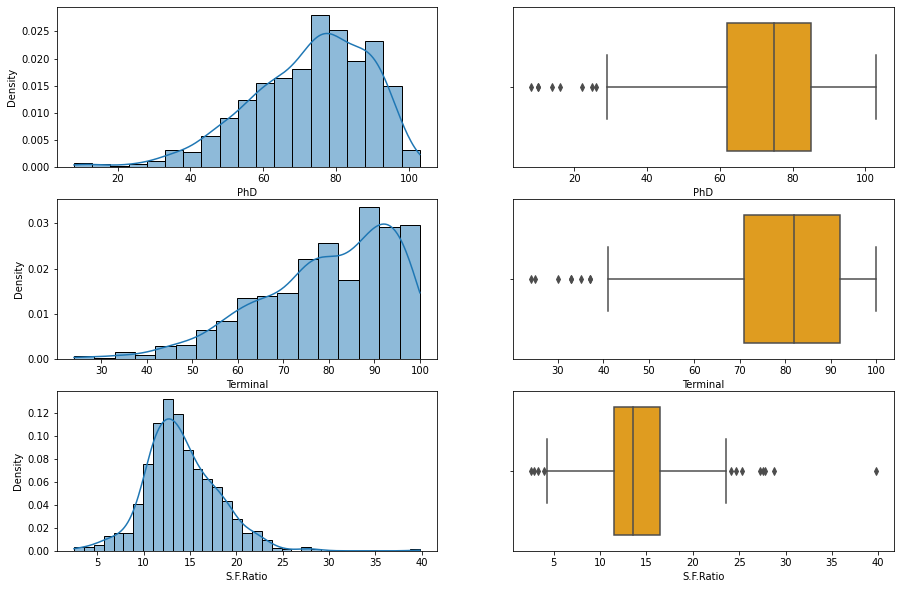

In [74]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,10)
a = sns.histplot(data=edu, x='PhD', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='PhD',color='orange', ax=axes[0][1])

a = sns.histplot(data=edu, x='Terminal', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='Terminal',color='orange', ax=axes[1][1])

a = sns.histplot(data=edu, x='S.F.Ratio', kde= True, stat = 'density', ax=axes[2][0])
a = sns.boxplot(data=edu, x='S.F.Ratio',color='orange', ax=axes[2][1])


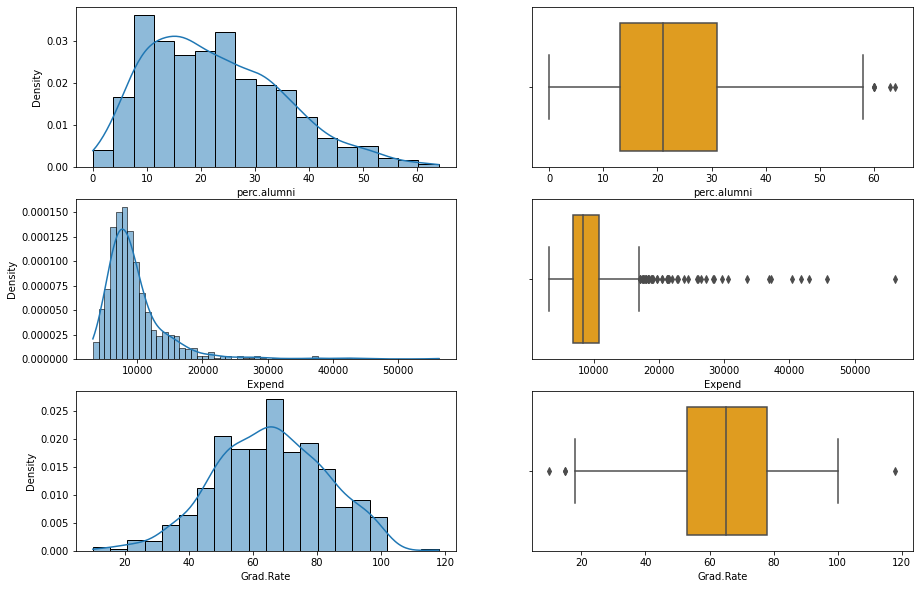

In [75]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,10)
a = sns.histplot(data=edu, x='perc.alumni', kde= True, stat = 'density', ax=axes[0][0])
a = sns.boxplot(data=edu, x='perc.alumni',color='orange', ax=axes[0][1])

a = sns.histplot(data=edu, x='Expend', kde= True, stat = 'density', ax=axes[1][0])
a = sns.boxplot(data=edu, x='Expend',color='orange', ax=axes[1][1])

a = sns.histplot(data=edu, x='Grad.Rate', kde= True, stat = 'density', ax=axes[2][0])
a = sns.boxplot(data=edu, x='Grad.Rate',color='orange', ax=axes[2][1])

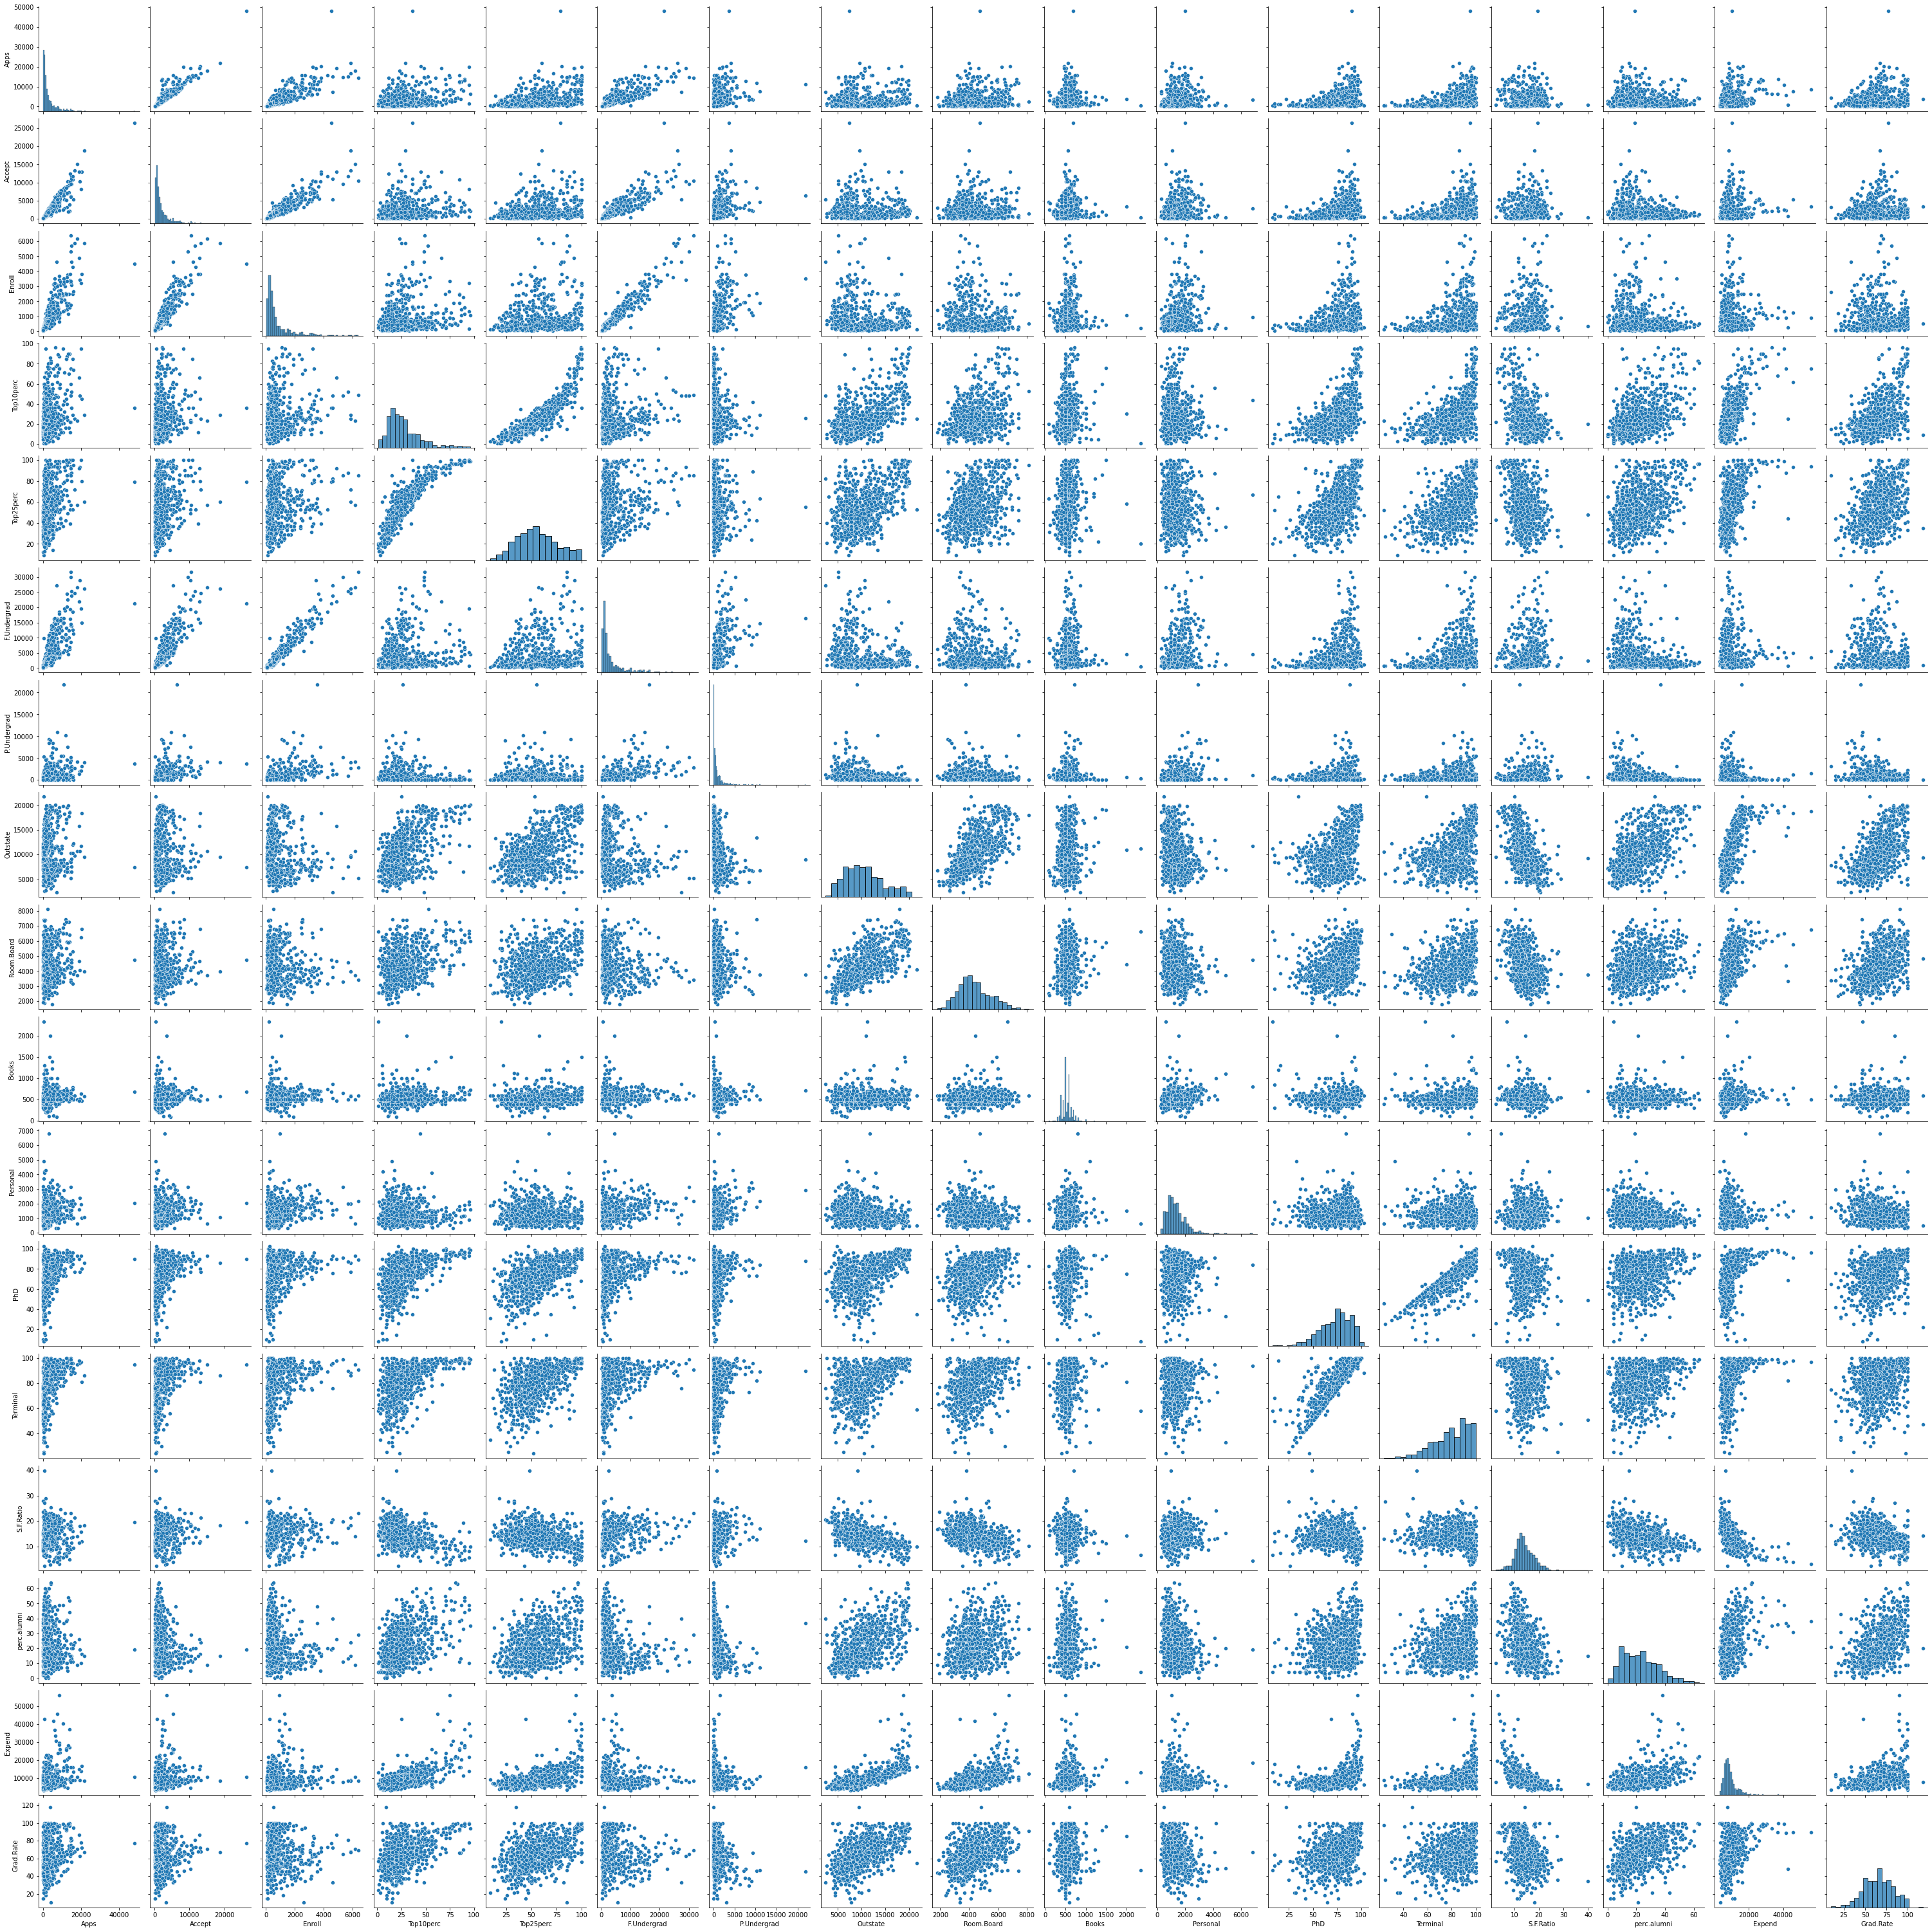

In [102]:
sns.pairplot(edu);

In [109]:
edu.corr()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

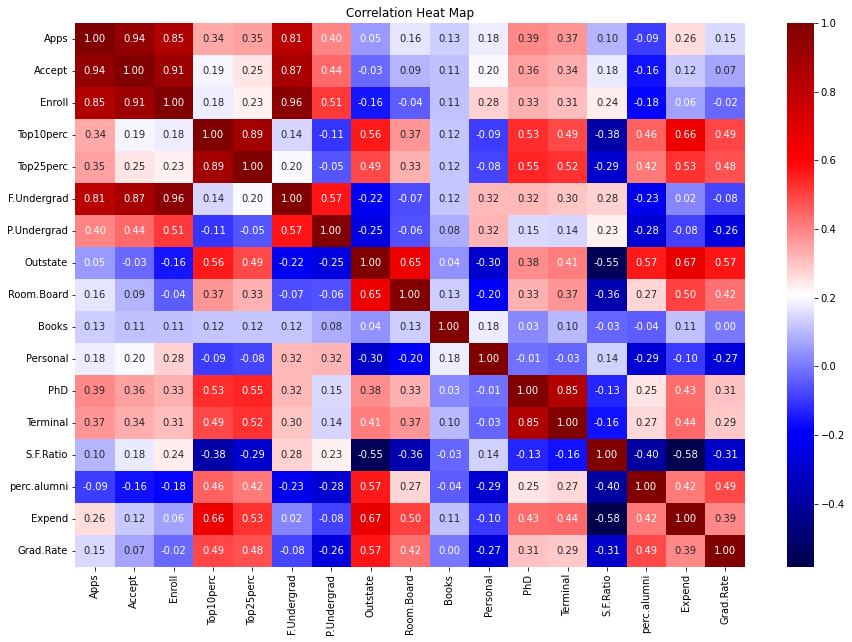

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(edu.corr(),annot=True, fmt = '.2f', cmap = 'seismic')
plt.title('Correlation Heat Map');
plt.show()

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster